# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

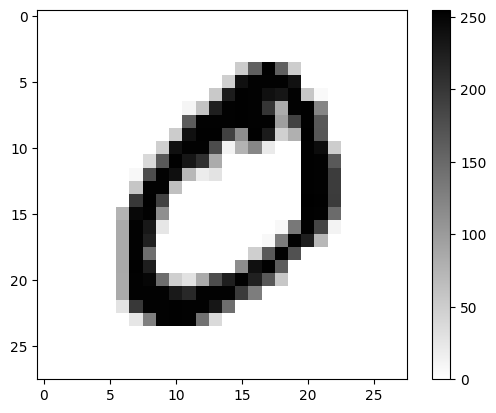

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 1

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

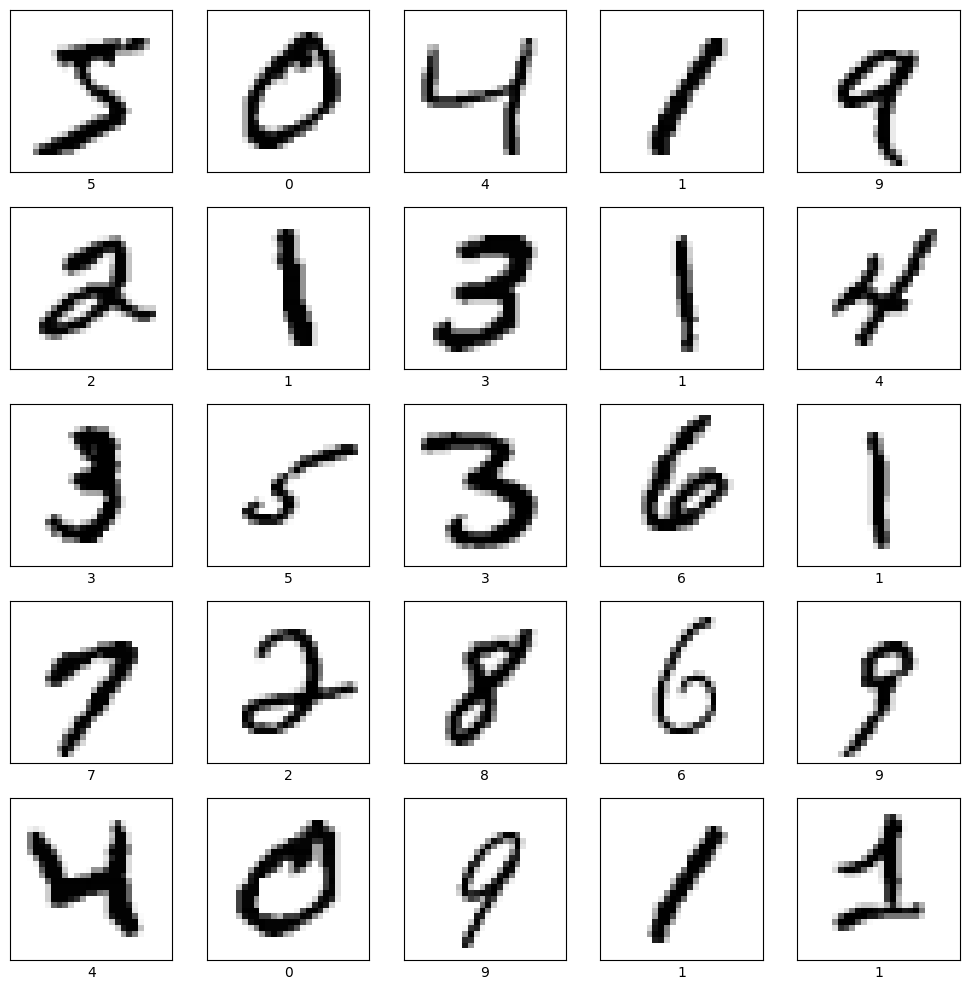

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [8]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [9]:
x_train = x_train.reshape(60000, -1)
x_val = x_val.reshape(10000, -1)

In [10]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨

In [11]:
x_train = x_train / 255.
x_test = x_val / 255.

## 4.모델링

In [12]:
nfeatures = x_train.shape[1]
nfeatures

784

In [13]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 20, validation_split=0.2).history

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5052 - val_loss: 0.3167
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3168 - val_loss: 0.2909
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2928 - val_loss: 0.2773
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2813 - val_loss: 0.2697
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2736 - val_loss: 0.2676
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2674 - val_loss: 0.2678
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2640 - val_loss: 0.2615
Epoch 8/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2597 - val_loss: 0.2646
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2578 - val_loss: 0.2611
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.254

* 학습결과 그래프

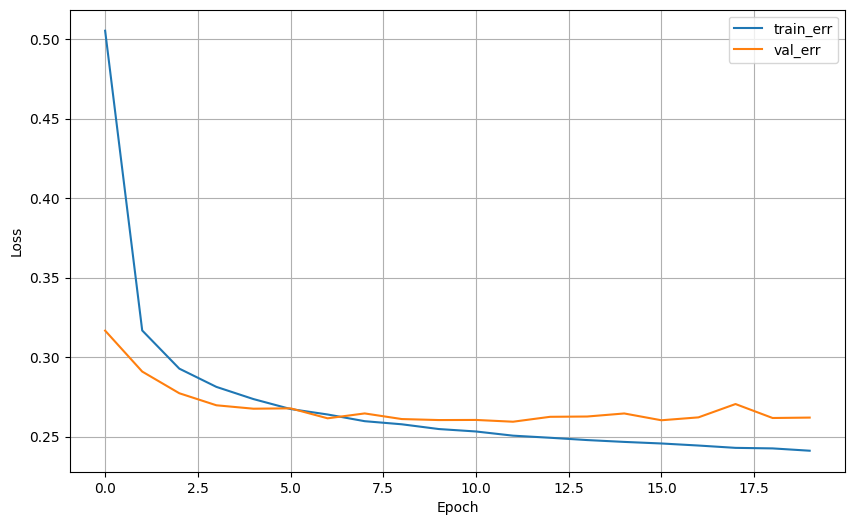

In [15]:
dl_history_plot(history)

* 예측 및 평가

In [16]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 1ms/step


In [17]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 963    0    0    2    1    6    4    3    1    0]
 [   0 1112    3    3    0    1    3    2   11    0]
 [   7   12  910   15    7    5   12   11   50    3]
 [   4    0   15  922    0   25    2   12   24    6]
 [   2    1    6    2  913    0    8    7   10   33]
 [   9    2    2   31    8  783   13    9   30    5]
 [  13    3    8    1    7   14  909    1    2    0]
 [   2    6   19    8    6    1    0  957    3   26]
 [   8    7    5   17    7   23    7   11  878   11]
 [  11    8    1    8   20    7    0   31    7  916]]
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.88      0.91      1032
           3       0.91      0.91      0.91      1010
           4       0.94      0.93      0.94       982
           5       0.91      0.88      0.89       892
           6       0.95      0.95      0.95       958
           7       0.92      0.93   

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [18]:
nfeatures = x_train.shape[1]
nfeatures

784

In [19]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(128, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
Total params: 111514 (435.60 KB)
Trainable params: 111514 (435.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
1500/1500 [==============================] - 9s 5ms/step - loss: 0.3519 - val_loss: 0.2299
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.2043 - val_loss: 0.2103
Epoch 3/50
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1835 - val_loss: 0.1809
Epoch 4/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1595 - val_loss: 0.1831
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1557 - val_loss: 0.1802
Epoch 6/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1408 - val_loss: 0.1740
Epoch 7/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1328 - val_loss: 0.1694
Epoch 8/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1420 - val_loss: 0.1644
Epoch 9/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1178 - val_loss: 0.1924
Epoch 10/50
1500/1500 [==============================] - 10s 7ms/step - los

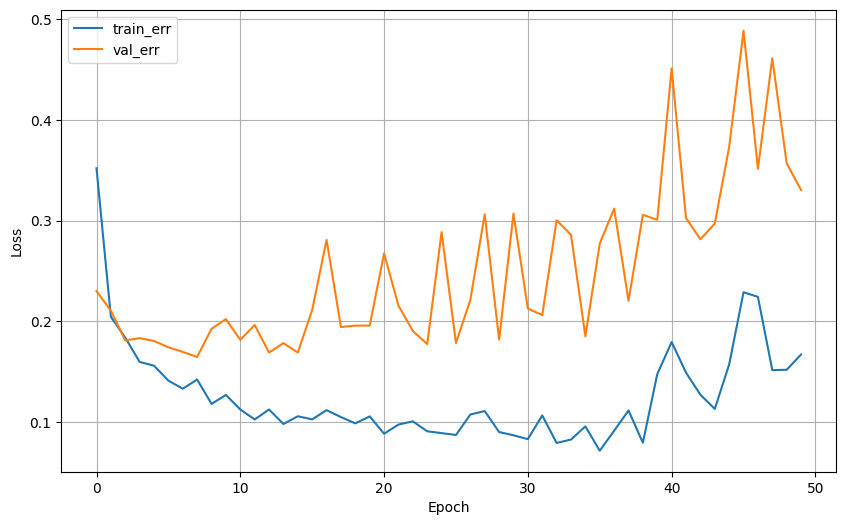

In [21]:
dl_history_plot(history)

In [22]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [23]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 955    0    0    1    0    7    6    8    2    1]
 [   0 1115    2    3    0    2    1    5    7    0]
 [   2    1  983    8    1   11    0   17    9    0]
 [   2    1    6  961    0   13    0   13   11    3]
 [   0    0    1    0  950    0    6    8    0   17]
 [   3    1    0    9    2  839    5   17   14    2]
 [   3    2    0    0    5   10  922    9    7    0]
 [   1    1   13    2    1    3    0  999    1    7]
 [   4    0    2    0    2    5    0   11  946    4]
 [   0    4    0   10    8   18    0   21    6  942]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.95      0.96      1032
           3       0.97      0.95      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.92      0.94      0.93       892
           6       0.98      0.96      0.97       958
           7       0.90      0.97   

### (2) 모델2

In [24]:
# 메모리 정리
clear_session()

# Sequential 타입 모델 선언
model = Sequential([Dense(256, input_shape = (nfeatures,), activation = 'relu'),
                    Dense(128, activation = 'relu'),
                    Dense(64, activation = 'relu'),
                    Dense(32, activation = 'relu'),
                    Dense(16, activation = 'relu'),
                    Dense(10, activation = 'softmax')
])

# 모델요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
Total params: 244890 (956.60 KB)
Trainable params: 24489

In [25]:
model.compile(optimizer=Adam(learning_rate=0.01),
              loss= 'sparse_categorical_crossentropy')

history = model.fit(x_train, y_train, epochs = 50,
                    validation_split=0.2).history

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3799 - val_loss: 0.2332
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2181 - val_loss: 0.1968
Epoch 3/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1895 - val_loss: 0.2078
Epoch 4/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1775 - val_loss: 0.2247
Epoch 5/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1804 - val_loss: 0.2255
Epoch 6/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1736 - val_loss: 0.2158
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2299 - val_loss: 0.5062
Epoch 8/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3518 - val_loss: 0.4473
Epoch 9/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2844 - val_loss: 0.2728
Epoch 10/50
1500/1500 [==============================] - 10s 6ms/step - loss: 0

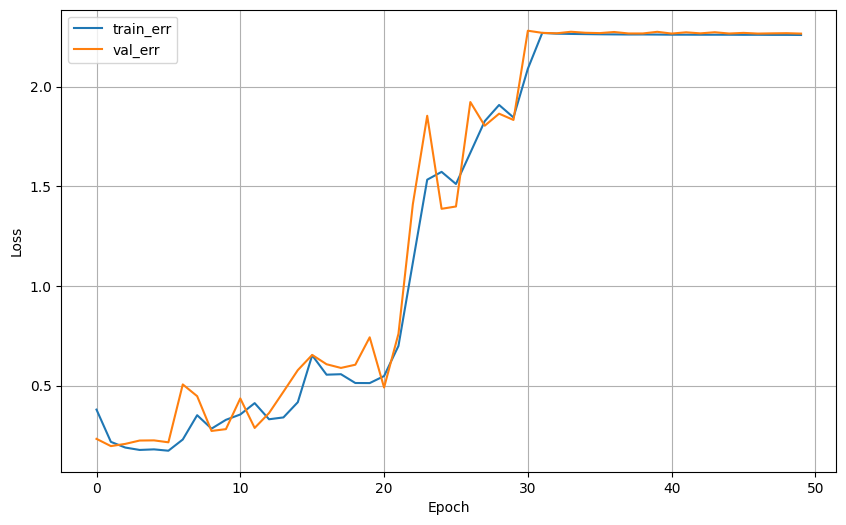

In [26]:
dl_history_plot(history)

In [27]:
pred = model.predict(x_test)
pred_1 = pred.argmax(axis=1)

313/313 [==============================] - 1s 2ms/step


In [28]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[  16    0    0    0    0    0  964    0    0    0]
 [   0  210    0    0    0    0  925    0    0    0]
 [   0    0    0    0    0    0 1032    0    0    0]
 [   0    0    0    0    0    0 1010    0    0    0]
 [   0    0    0    0    0    0  982    0    0    0]
 [   3    0    0    0    0    0  889    0    0    0]
 [   0    5    0    0    0    0  953    0    0    0]
 [   0    0    0    0    0    0 1028    0    0    0]
 [   0    0    0    0    0    0  974    0    0    0]
 [   0    0    0    0    0    0 1009    0    0    0]]
              precision    recall  f1-score   support

           0       0.84      0.02      0.03       980
           1       0.98      0.19      0.31      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.10      0.99      0.18       958
           7       0.00      0.00   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
